# DATA IMPORT

In [5]:
from IPython.display import IFrame

IFrame('https://data.tuik.gov.tr/', width=900, height=450)




# INSTALL

In [56]:
!pip install matplotlib
!pip install pandas-profiling







  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/5.8 MB ? eta -:--:--
     --- ------------------------------------ 0.5/5.8 MB 837.5 kB/s eta 0:00:07
     --- ------------------------------------ 0.5/5.8 MB 837.5 kB/s eta 0:00:07
     ----- ---------------------------------- 0.8/5.8 MB 799.2 kB/s eta 0:00:07
     ------- -------------------------------- 1.0/5.8 MB 882.6 kB/s eta 0:00:06
     ------- -------------------------------- 1.0/5.8 MB 882.6 kB/s eta 0:00:06
     --------- ------------------------------ 1.3/5.8 MB 838.9 kB/s eta 0:00:06
     --------- ------------------------------ 1.3/5.8 MB 838.9 kB/s eta 0:00:06
     ---------- ----------------------------- 1.6/5.8 MB 776.5 kB/s eta 0:00:06
     ---------- -----------------------------

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 35, in <module>
    File "C:\Users\fatih\AppData\Local\Temp\pip-install-0b6dvey2\pystan_bd0e1f55de54475ca71c8fdadead2dfe\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
!pip install prophet

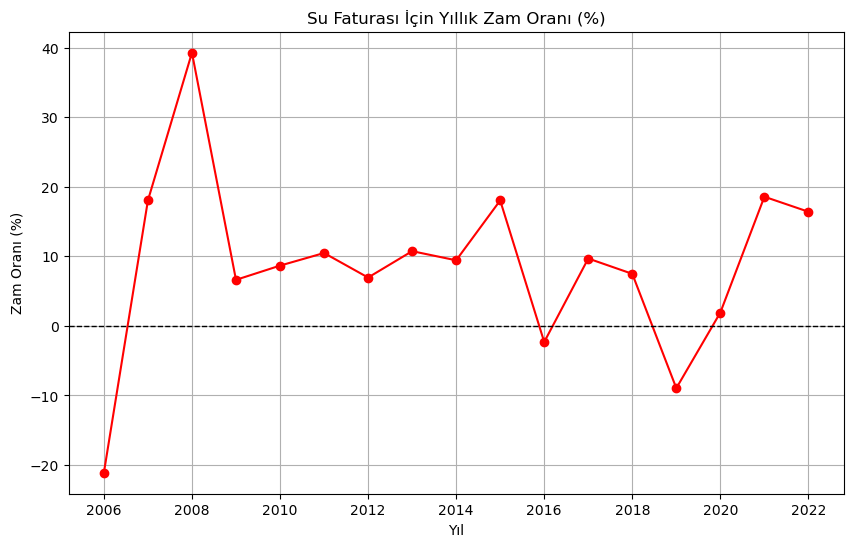

,Year,Price,Zam (%)
0,2005,2.104100,NaN
1,2006,1.660000,-21.106411
2,2007,1.959233,18.026104
3,2008,2.728392,39.258128
4,2009,2.908892,6.615619
5,2010,3.160758,8.658510
6,2011,3.491767,10.472434
7,2012,3.734267,6.944908
8,2013,4.135200,10.736602
9,2014,4.524900,9.423970


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv('pivot enerji.csv', sep='|', header=None, skiprows=4)
df.columns = ['Year', 'Month', 'Product', 'Price', 'Extra']
df.drop(columns=['Extra'], inplace=True)

df['Year'] = df['Year'].ffill()
df['Month'] = df['Month'].ffill()

pattern = r'\((.*?)\)'
df['Product'] = df['Product'].apply(lambda x: re.search(pattern, x).group(1) if pd.notnull(x) else x)

df['Year'] = df['Year'].astype(int)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

urun = "Su Faturası" 

urun_df = df[df['Product'] == urun]
yillik_fiyat = urun_df.groupby('Year')['Price'].mean().reset_index()

yillik_fiyat['Zam (%)'] = yillik_fiyat['Price'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(yillik_fiyat['Year'], yillik_fiyat['Zam (%)'], marker='o', color='red')
plt.title(f"{urun} İçin Yıllık Zam Oranı (%)")
plt.xlabel("Yıl")
plt.ylabel("Zam Oranı (%)")
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

yillik_fiyat


# DATA CLEANİNG AND PREPARATİON

In [31]:
from ydata_profiling import ProfileReport

# Profil raporu oluştur
profile = ProfileReport(df, title="Zam Verisi Profil Raporu", explorative=True)

# Notebook içinde göster (iframe ile)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 40.74it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA TRANSPOSE & CORRETATION

In [32]:

df_pivot = df.pivot_table(values='Price', index=['Year', 'Month'], columns='Product')

df_pivot.head()

Product        Doğal Gaz  Elektrik Ücreti  Su Faturası  İnternet Ücreti
Year Month                                                             
2005 01-Ocak        0.41             0.16       2.2301          13.6864
     02-Şubat       0.41             0.16       2.2301          13.6917
     03-Mart        0.43             0.16       2.2301          13.6917
     04-Nisan       0.43             0.16       2.2301          13.9496
     05-Mayıs       0.43             0.16       2.0411          14.2074

In [36]:

corr = df_pivot.corr()

print(corr.unstack())  
corr  

Product          Product        
Doğal Gaz        Doğal Gaz          1.000000
                 Elektrik Ücreti    0.974183
                 Su Faturası        0.866066
                 İnternet Ücreti    0.412973
Elektrik Ücreti  Doğal Gaz          0.974183
                 Elektrik Ücreti    1.000000
                 Su Faturası        0.851136
                 İnternet Ücreti    0.348441
Su Faturası      Doğal Gaz          0.866066
                 Elektrik Ücreti    0.851136
                 Su Faturası        1.000000
                 İnternet Ücreti    0.366410
İnternet Ücreti  Doğal Gaz          0.412973
                 Elektrik Ücreti    0.348441
                 Su Faturası        0.366410
                 İnternet Ücreti    1.000000
dtype: float64


Product,Doğal Gaz,Elektrik Ücreti,Su Faturası,İnternet Ücreti
Product,,,,
Doğal Gaz,1.000000,0.974183,0.866066,0.412973
Elektrik Ücreti,0.974183,1.000000,0.851136,0.348441
Su Faturası,0.866066,0.851136,1.000000,0.366410
İnternet Ücreti,0.412973,0.348441,0.366410,1.000000


Product          Product        
Doğal Gaz        Doğal Gaz          1.000000
Elektrik Ücreti  Elektrik Ücreti    1.000000
İnternet Ücreti  İnternet Ücreti    1.000000
Su Faturası      Su Faturası        1.000000
Elektrik Ücreti  Doğal Gaz          0.974183
Doğal Gaz        Elektrik Ücreti    0.974183
                 Su Faturası        0.866066
Su Faturası      Doğal Gaz          0.866066
Elektrik Ücreti  Su Faturası        0.851136
Su Faturası      Elektrik Ücreti    0.851136
İnternet Ücreti  Doğal Gaz          0.412973
Doğal Gaz        İnternet Ücreti    0.412973
İnternet Ücreti  Su Faturası        0.366410
Su Faturası      İnternet Ücreti    0.366410
Elektrik Ücreti  İnternet Ücreti    0.348441
İnternet Ücreti  Elektrik Ücreti    0.348441
dtype: float64

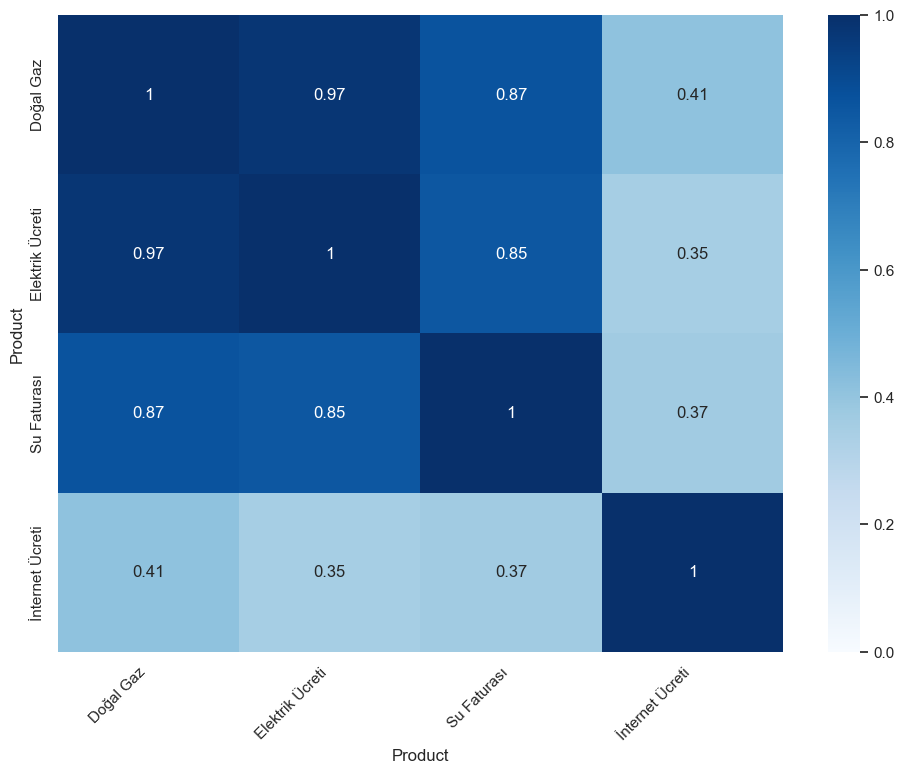

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7, 8.27)})

ax = sns.heatmap(
    corr,
    cmap='Blues',
    vmin=0,
    vmax=1,
    center=0.5,
    annot=True
)

ax.set_xticklabels(corr.index, horizontalalignment='right', rotation=45)


stack = corr.unstack()
stack.sort_values(kind="quicksort", ascending=False)

# TIME SERIES

In [44]:
df = df.loc[df['Product'].str.lower().str.replace(' ', '').str.replace('ü','u').str.replace('ç','c').str.replace('ı','i') == 'elektrikucreti']
df



,Year,Month,Product,Price
1,2005,01-Ocak,Elektrik Ücreti,0.1600
5,2005,02-Şubat,Elektrik Ücreti,0.1600
9,2005,03-Mart,Elektrik Ücreti,0.1600
13,2005,04-Nisan,Elektrik Ücreti,0.1600
17,2005,05-Mayıs,Elektrik Ücreti,0.1600
...,...,...,...,...
813,2021,12-Aralık,Elektrik Ücreti,0.9172
817,2022,01-Ocak,Elektrik Ücreti,1.5562
821,2022,02-Şubat,Elektrik Ücreti,1.4809
825,2022,03-Mart,Elektrik Ücreti,1.3372


In [65]:
import pandas as pd
import datetime
from IPython.display import display

def safe_date(row):
    try:
        return datetime.date(int(row["Year"]), int(row["Month"]), 1)
    except:
        return pd.NaT  # Geçersiz veriyi NaT olarak işaretle

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Date'] = df.apply(safe_date, axis=1)

df = df.dropna(subset=['Date', 'Price'])

display(df.head(10))

print("Toplam Satır Sayısı:", len(df))

print("\nEksik Veri Kontrolü:")
print(df.isna().sum())

display(df[['Year', 'Month', 'Product', 'Price']].head(20))


KeyError: 'Price'

# PROPHET SERIES

In [19]:
df = pd.read_csv('pivot enerji.csv', sep='|', skiprows=4)


In [63]:
df_valid['tarih_string'] = df_valid['2005'].astype(int).astype(str) + '-' + df_valid['01-Ocak']

aylar = {
    'Ocak': 'January', 'Şubat': 'February', 'Mart': 'March', 'Nisan': 'April',
    'Mayıs': 'May', 'Haziran': 'June', 'Temmuz': 'July', 'Ağustos': 'August',
    'Eylül': 'September', 'Ekim': 'October', 'Kasım': 'November', 'Aralık': 'December'
}
df_valid['tarih_string'] = df_valid['tarih_string'].replace(aylar, regex=True)

df_valid['ds'] = pd.to_datetime(df_valid['tarih_string'], errors='coerce', dayfirst=True)

df_valid['y'] = pd.to_numeric(df_valid['2.2301'], errors='coerce')

df_clean = df_valid[['ds', 'y']].dropna()

print(df_clean.shape)
print(df_clean.head())


(17, 2)
            ds       y
47  2006-01-01  1.6200
95  2007-01-01  1.7700
143 2008-01-01  2.6454
191 2009-01-01  2.8196
239 2010-01-01  3.0577


C:\Users\fatih\AppData\Local\Temp\ipykernel_6456\3787584393.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_valid['ds'] = pd.to_datetime(df_valid['tarih_string'], errors='coerce', dayfirst=True)


00:27:03 - cmdstanpy - INFO - Chain [1] start processing
00:27:03 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\fatih\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


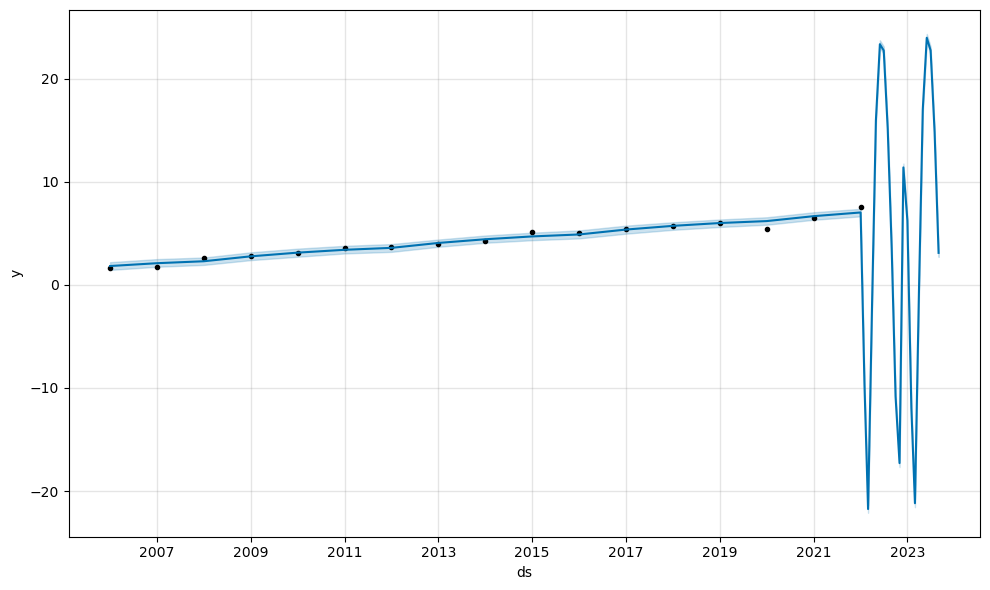

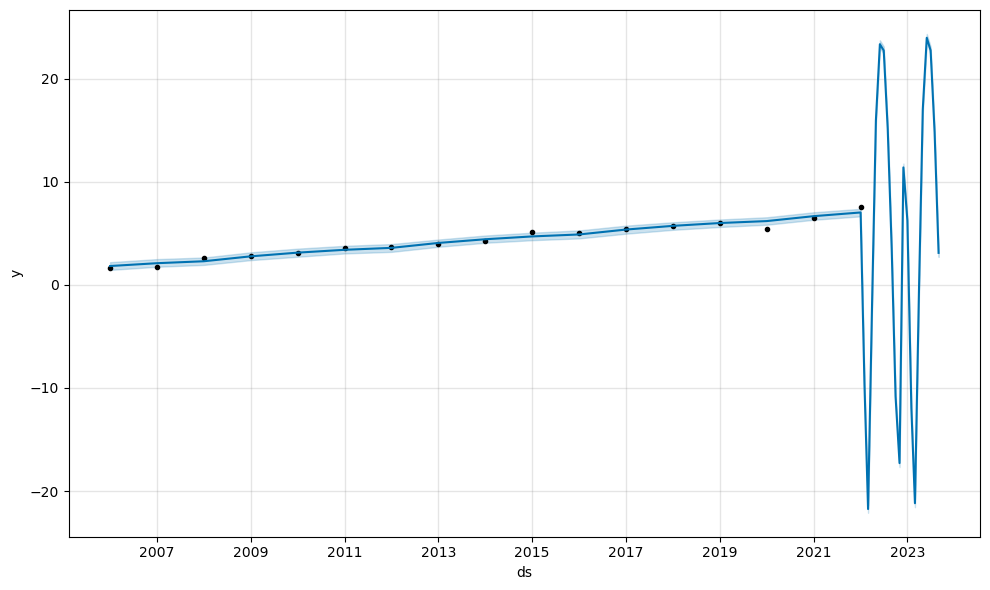

In [47]:
from prophet import Prophet

model = Prophet()
model.fit(df_clean)

future = model.make_future_dataframe(periods=20, freq='M')
forecast = model.predict(future)
model.plot(forecast)


00:36:40 - cmdstanpy - INFO - Chain [1] start processing
00:36:40 - cmdstanpy - INFO - Chain [1] done processing


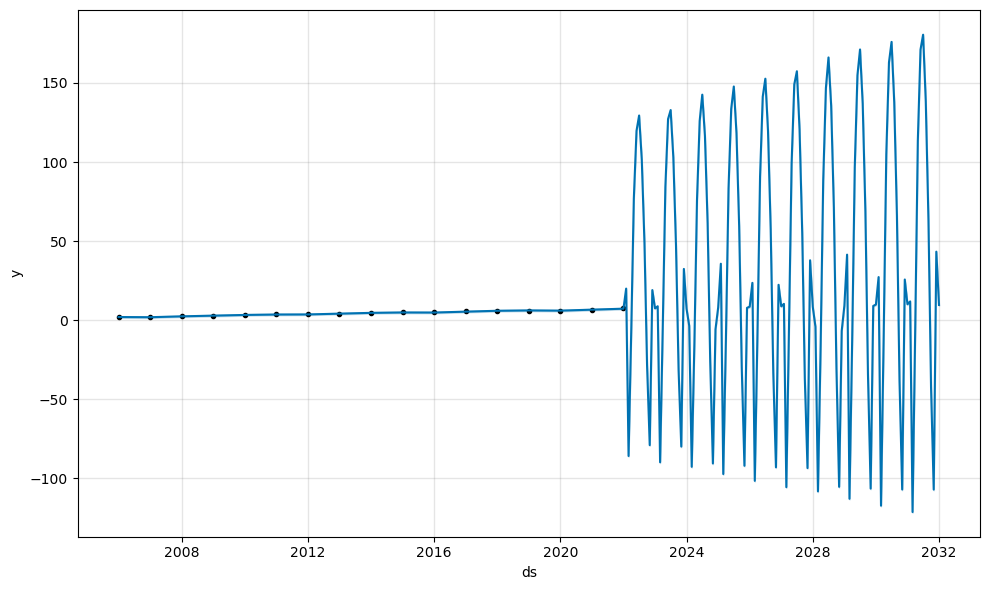

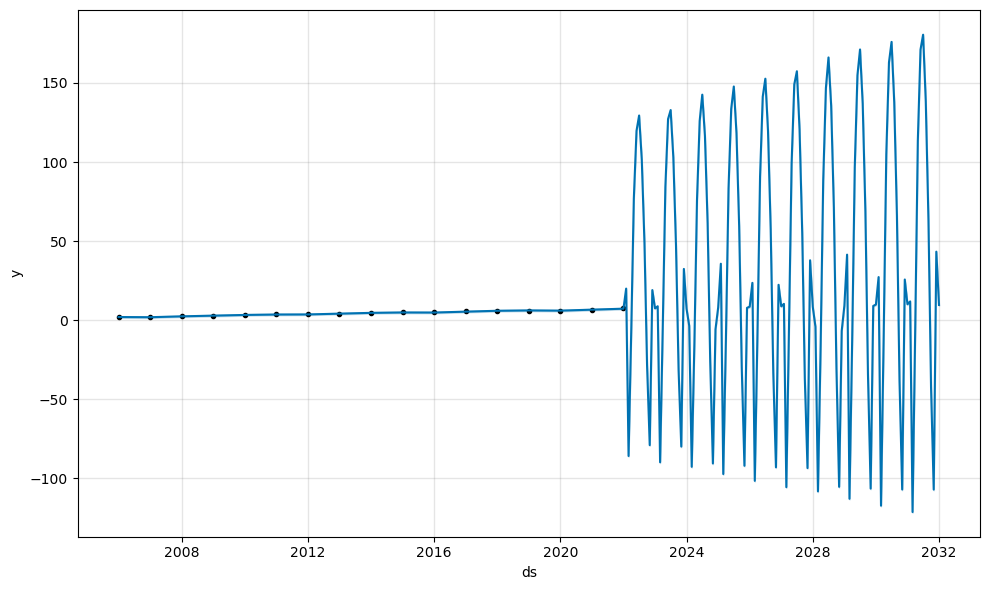

In [61]:
from prophet import Prophet

m = Prophet(
    seasonality_mode='multiplicative',
    interval_width=0.95
)

try:
    m.add_country_holidays(country_name='TR')
except:
    pass

m.fit(df_clean)

future = m.make_future_dataframe(periods=120, freq='MS')

forecast = m.predict(future)

m.plot(forecast)


In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


,ds,yhat,yhat_lower,yhat_upper
107,2029-08-01,136.892789,136.437276,137.381028
108,2029-09-01,68.800105,68.356137,69.253023
109,2029-10-01,-34.528804,-35.009254,-34.078323
110,2029-11-01,-106.694798,-107.185234,-106.256949
111,2029-12-01,8.892842,8.450793,9.343935
112,2030-01-01,9.811215,9.294525,10.263578
113,2030-02-01,27.160075,26.714298,27.609347
114,2030-03-01,-117.514512,-117.998746,-117.053933
115,2030-04-01,-9.336297,-9.800622,-8.881829
116,2030-05-01,104.841466,104.402300,105.315897


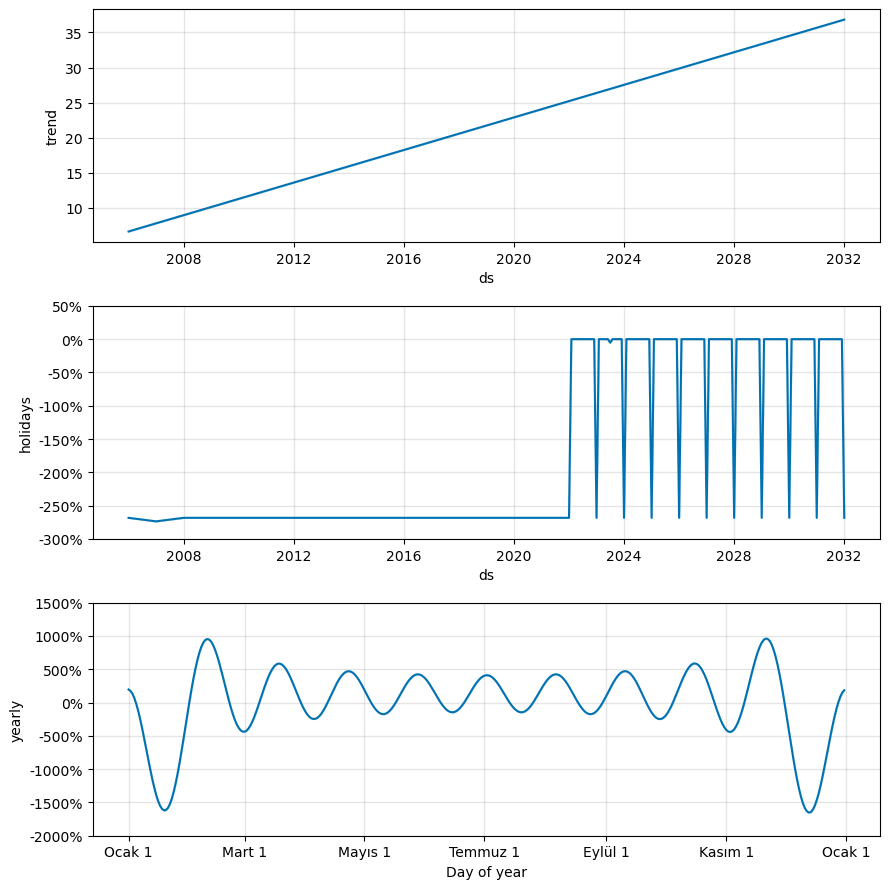

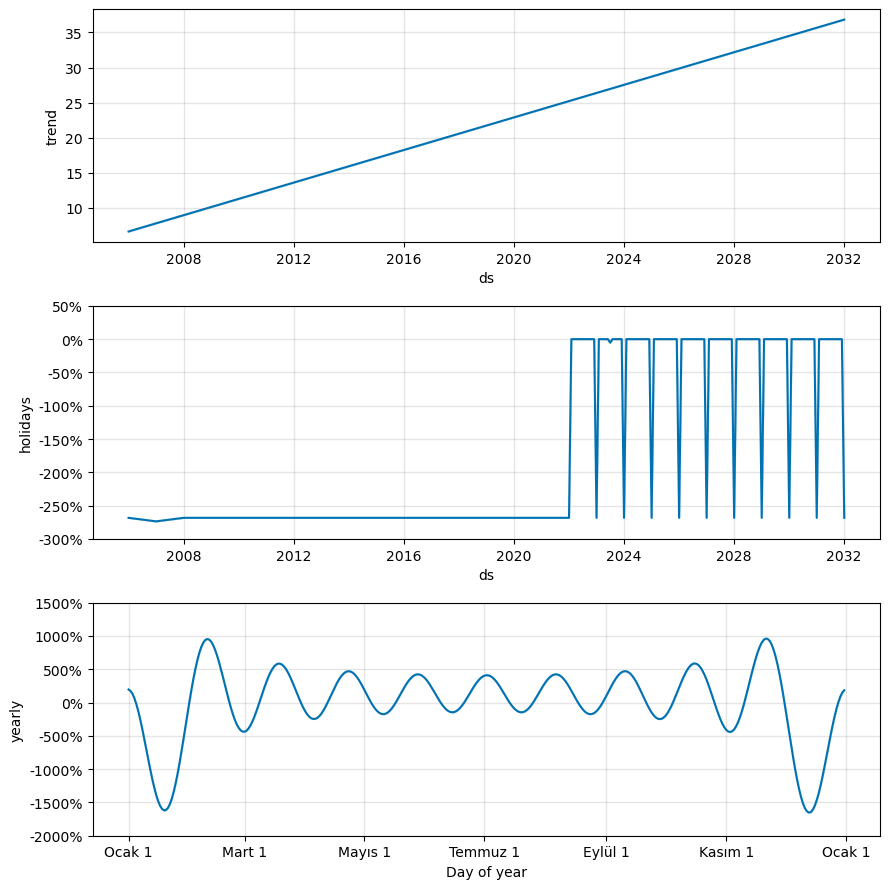

In [55]:
m.plot_components(forecast)


In [59]:

preds = forecast.copy()

preds['Year'] = preds['ds'].apply(lambda x: x.year)
preds['Month'] = preds['ds'].apply(lambda x: x.month)

preds.loc[preds['Year'] == 2025].T  


,52,53,54,55,56,57,58,59,60,61,62,63
ds,2025-01-01 00:00:00,2025-02-01 00:00:00,2025-03-01 00:00:00,2025-04-01 00:00:00,2025-05-01 00:00:00,2025-06-01 00:00:00,2025-07-01 00:00:00,2025-08-01 00:00:00,2025-09-01 00:00:00,2025-10-01 00:00:00,2025-11-01 00:00:00,2025-12-01 00:00:00
trend,28.709423,28.807968,28.896976,28.995521,29.090887,29.189432,29.284798,29.383343,29.481888,29.577254,29.675799,29.771165
yhat_lower,7.364683,35.159776,-97.927362,-11.866208,82.768843,133.133066,147.309899,117.766006,58.996083,-30.307791,-92.686372,7.206368
yhat_upper,8.282607,36.102039,-96.996992,-10.923463,83.71207,134.108696,148.237661,118.656042,59.920015,-29.367411,-91.773881,8.150081
trend_lower,28.709423,28.807968,28.896976,28.995521,29.090887,29.189432,29.284798,29.383343,29.481888,29.577254,29.675799,29.771165
trend_upper,28.709423,28.807968,28.896976,28.995521,29.090887,29.189432,29.284798,29.383343,29.481888,29.577254,29.675799,29.771165
"Commemoration of Atatürk, Youth and Sports Day",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Commemoration of Atatürk, Youth and Sports Day_lower",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Commemoration of Atatürk, Youth and Sports Day_upper",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Democracy and National Unity Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
